(256, 256)


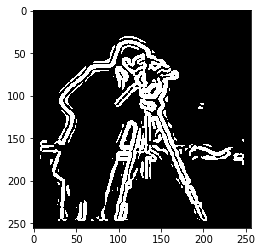

In [22]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
import sys
import math

def calculateSize(sigma):
    return 6 * sigma + 1
    
def calculateLoG(x,y,sigma):
    loG = (-1/(math.pi*(sigma**4)))
    mid = (1 - ( ((x)**2 + (y)**2) /(2*sigma**2)))
    exp = (math.exp( -( ((x)**2 + (y)**2))/( 2 * sigma**2)))
    return loG * mid * exp
    
def convolve(image, imageFilter, size):
    newImage = np.zeros(image.shape)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            if(i - (size//2) >= 0 and j - (size//2) >= 0 and i + (size//2) < image.shape[0] and j + (size//2) < image.shape[1]):
                newImage[i][j] = np.sum(image[i - size//2: i + (size//2) + 1, j - size//2: j + (size//2) + 1] * imageFilter)
    return newImage
    
def LoGEdgeDetection(fileName, sigma, threshold):
    s = calculateSize(sigma)
    image = Image.open(fileName)
    img = np.array(image, dtype='int64')
    imageFilter = np.zeros((s,s))
    for i in range (-s//2, s//2 + 1):
        for j in range (-s//2, s//2 + 1):
            imageFilter[i+s//2][j+s//2] = calculateLoG(i,j,sigma)
    result = convolve(img, imageFilter, s)
    gradientsVertical = getVerticalEdges(result)
    gradientsHorizontal = getHorizontalEdges(result)
    
    gradients = np.zeros(img.shape)
    print(gradients.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            result = math.sqrt((gradientsVertical[i][j]**2) + (gradientsHorizontal[i][j]**2))
            gradients[i][j] = result
    
    max = np.amax(gradients)
    norm = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            norm[i][j] = gradients[i][j] / max
    
    final = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if(norm[i][j] < 0.25):
                final[i][j] = 0
            else:
                final[i][j] = 1
    plt.imshow(final, cmap='gray')
    plt.savefig("Log_" + str(sigma) + ".jpg")
#     savedImage = Image.fromarray(final,'L')
#     savedImage = savedImage.convert('RGB')
#     savedImage.save("Log_" + str(sigma) + ".jpg")
                
def getVerticalEdges(image):
    prewitt = np.zeros((3,3))
    prewitt[0][0] = -1
    prewitt[1][0] = -1
    prewitt[2][0] = -1
    prewitt[0][2] = 1
    prewitt[1][2] = 1
    prewitt[2][2] = 1
    newImage = np.zeros(image.shape)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            if(i - 1 >= 0 and j - 1 >= 0 and i + 1 < image.shape[0] and j + 1 < image.shape[1]):
                newImage[i][j] = np.sum(image[i - 1: i + 2, j - 1: j + 2] * prewitt)
    return newImage
    
def getHorizontalEdges(image):
    prewitt = np.zeros((3,3))
    prewitt[0][0] = -1
    prewitt[0][1] = -1
    prewitt[0][2] = -1
    prewitt[2][0] = 1
    prewitt[2][1] = 1
    prewitt[2][2] = 1
    newImage = np.zeros(image.shape)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            if(i - 1 >= 0 and j - 1 >= 0 and i + 1 < image.shape[0] and j + 1 < image.shape[1]):
                newImage[i][j] = np.sum(image[i - 1: i + 2, j - 1: j + 2] * prewitt)
    return newImage
    
LoGEdgeDetection('Cameraman.tif', 4, 0.1)